# <center><div style="font-family: Trebuchet MS; background-color: #57C5B6; color: #2D2926; padding: 12px; line-height: 1;">SuperStore in USA</div></center>

<div>
<img src="pig.png" width=500>
</div>

### About Data:

This dataset is containing sales of a Superstore. With growing demands and cut-throat competitions in the market, a Superstore Giant is dataset from 2015-2018. The Dataset is filled attributes such as Category, Segment, Sub-Category, Region, State, City. We hope can Offer promotions or discounts on certain products to increase sales, Improve the quality of customer service to increase customer satisfaction and encourage customers to return for future purchases, Increase market penetration by opening new branches or exploring new markets, Develope new products or improving the quality of existing products to attract more customers by this dataset Eventually.

### Goals:

- Find out Insight.
- Compare the results and decide the best model to forecast in this dataset.
- Visualize between test data and forecasting results.

### Problem Statement:
- How good the model can perform to Superstore Revenue?


**Dataset Column description:**

| Column Name | Description |
|-------------|-------------|
| Row ID | Unique ID for each row.
| Order ID | Unique Order ID for each Customer.
| Order Date | Order Date of the product.
| Ship Date | Shipping Date of the Product.
| Ship Mode| Shipping Mode specified by the Customer.
| Customer ID | Unique ID to identify each Customer.
| Customer Name | Name of the Customer.
| Segment | The segment where the Customer belongs.
| Country | Country of residence of the Customer.
| City | City of residence of of the Customer.
| State | State of residence of the Customer.
| Postal Code | Postal Code of every Customer.
| Region | Region where the Customer belong.
| Product ID | Unique ID of the Product.
| Category | Category of the product ordered.
| Sub-Category | Sub-Category of the product ordered.
| Product Name | Name of the Product
| Sales | Sales of the Product.

# <center><div style="font-family: Trebuchet MS; background-color: #57C5B6; color: #2D2926; padding: 12px; line-height: 1;">Import Package</div></center>

In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from prophet import Prophet
from prophet.plot import plot_plotly
from statsmodels.tsa.ar_model import AutoReg,ARResults
nlag = 40
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [2]:
df= pd.read_csv('superstore.csv')

In [3]:
df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0      42420.0  South  FUR-BO-10001798        Furniture    Bookcases   
1      42420.0  South  FUR-CH-10000454        Furniture       Chairs   
2      90036.0   West  OFF-LA-10000240  Office Supplies       Labels   
3      33311.0  South  FUR-TA-10000577        Furniture       Tables   
4      33311.0  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  
0                  Bush Somerset Collection Bookcase  261.9600  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2  Self-Adhesive Address Labels for Typewriters b...   14.6200  
3      Bretford CR4500 Series Slim Rectangular Table  957.5775  
4                     Eldon Fold 'N Roll Cart System   22.3680

In [4]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [5]:
df.drop(['Postal Code','Row ID','Order ID'],axis = 1, inplace = True)

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(keep= 'first', inplace= True)

In [8]:
df['Order Date']= pd.to_datetime(df['Order Date'])
df['Ship Date']= pd.to_datetime(df['Ship Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9799 entries, 0 to 9799
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     9799 non-null   datetime64[ns]
 1   Ship Date      9799 non-null   datetime64[ns]
 2   Ship Mode      9799 non-null   object        
 3   Customer ID    9799 non-null   object        
 4   Customer Name  9799 non-null   object        
 5   Segment        9799 non-null   object        
 6   Country        9799 non-null   object        
 7   City           9799 non-null   object        
 8   State          9799 non-null   object        
 9   Region         9799 non-null   object        
 10  Product ID     9799 non-null   object        
 11  Category       9799 non-null   object        
 12  Sub-Category   9799 non-null   object        
 13  Product Name   9799 non-null   object        
 14  Sales          9799 non-null   float64       
dtypes: datetime64[ns](2),

# <center><div style="font-family: Trebuchet MS; background-color: #57C5B6; color: #2D2926; padding: 12px; line-height: 1;">EDA</div></center>

In [10]:
x = df.copy()

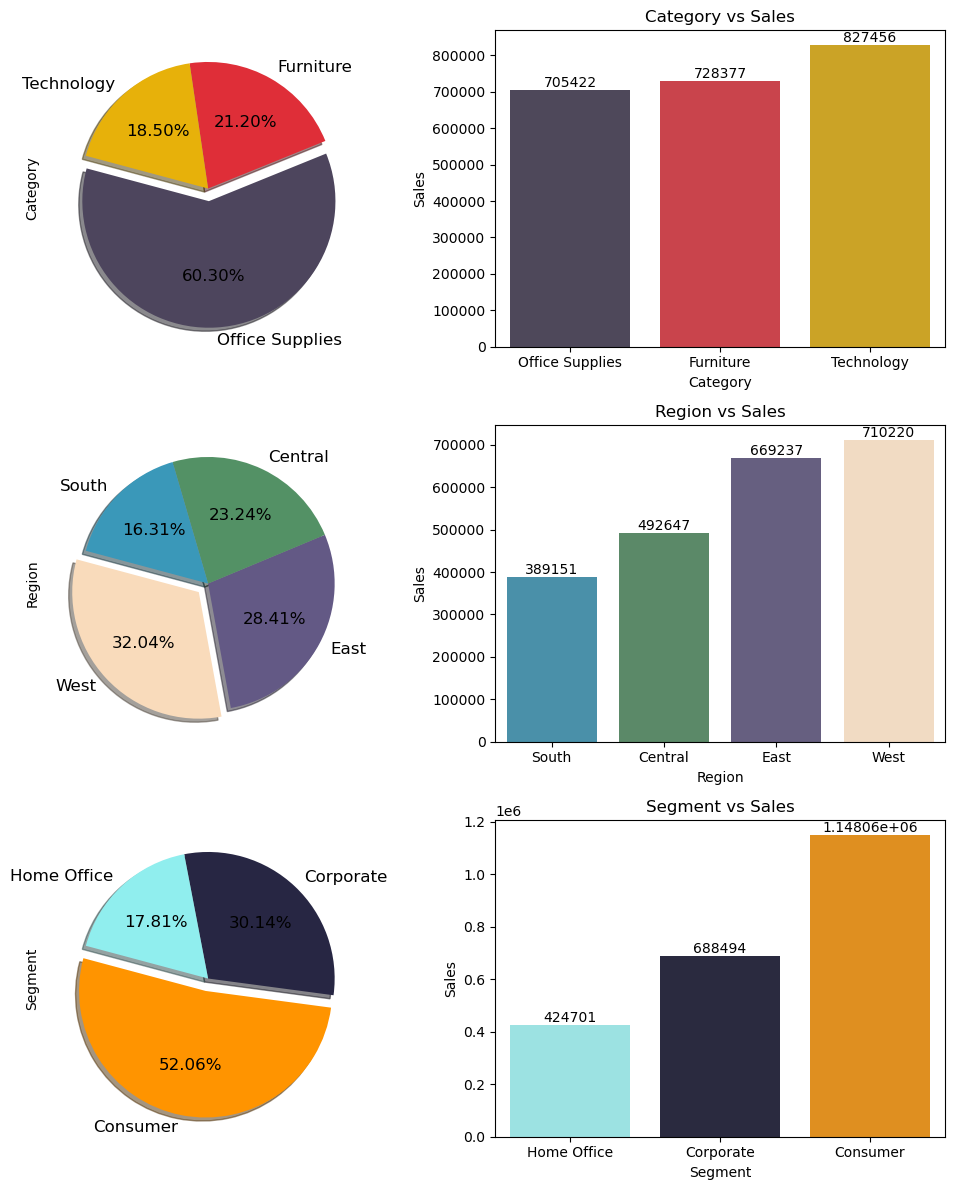

In [11]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(10,12));

ax1 = x['Category'].value_counts().plot.pie(shadow = True, explode=[0.1, 0, 0],autopct='%.2f%%', 
                                                textprops={'fontsize':12}, startangle=165, 
                                                colors=['#4D455D', '#DF2E38', '#E7B10A'], ax=ax1)

cat = x.groupby(['Category'])['Sales'].sum().sort_values().reset_index()
ax2 = sns.barplot(x=cat['Category'], y=cat['Sales'], data=cat, palette = ['#4D455D', '#DF2E38', '#E7B10A'],ax=ax2)
for i in ax2.containers:
    ax2.bar_label(i, label_type='edge')
ax2.set_ylabel('Sales')
ax2.set_title('Category vs Sales')


ax3 = x['Region'].value_counts().plot.pie(shadow = True, explode=[0.1, 0, 0, 0],autopct='%.2f%%', 
                                                      textprops={'fontsize':12}, startangle=165, ax=ax3, 
                                                      colors=['#F9DBBB', '#635985', '#539165', '#3A98B9']) 

reg = x.groupby(['Region'])['Sales'].sum().sort_values().reset_index()
ax4 = sns.barplot(x=reg['Region'], y=reg['Sales'], data=reg, ax=ax4, palette=['#3A98B9','#539165', '#635985', '#F9DBBB'])
for i in ax4.containers:
    ax4.bar_label(i, label_type='edge')
ax4.set_ylabel('Sales')
ax4.set_title('Region vs Sales')


ax5 = x['Segment'].value_counts().plot.pie(shadow = True, explode=[0.1, 0, 0],autopct='%.2f%%', 
                                                      textprops={'fontsize':12}, startangle=165, ax=ax5, 
                                                      colors=['#FF9400','#272643','#90EEEE']) 

seg = x.groupby(['Segment'])['Sales'].sum().sort_values().reset_index()
ax6 = sns.barplot(x=seg['Segment'], y=seg['Sales'], data=seg, ax=ax6, palette=['#90EEEE','#272643', '#FF9400'])
for i in ax6.containers:
    ax6.bar_label(i, label_type='edge')
ax6.set_ylabel('Sales')
ax6.set_title('Segment vs Sales')

plt.tight_layout()
plt.show()

Insight: 
1. The office supplies category, west region, and consumer segment have the 
highest sales volume. However, the highest total sales were obtained by the technology category, south region, and Home Office segment. 
2. That happens because the products sold in the office supplies section have lower prices, while technology products are different. Customers in the south often buy high-priced items such as technology. Similarly, the demand for goods in the home office segment is high.


In [12]:
x['Order_Day'] = x['Order Date'].apply(lambda x: x.strftime('%A'))
x['Order_Month']= x['Order Date'].apply(lambda x: x.strftime('%B'))
x['Order_Year']= x['Order Date'].dt.year
x['ord_day']= x['Order Date'].dt.day
x['ship_day']= x['Ship Date'].dt.day
x['delivery']= x['Ship Date']-x['Order Date']
x['Year_month']= x['Order Date'].apply(lambda x: x.strftime('%Y-%m'))
x['Year_month']= pd.to_datetime(x['Year_month'])
x.head()

Order Date  Ship Date       Ship Mode Customer ID    Customer Name  \
0 2017-08-11 2017-11-11    Second Class    CG-12520      Claire Gute   
1 2017-08-11 2017-11-11    Second Class    CG-12520      Claire Gute   
2 2017-12-06 2017-06-16    Second Class    DV-13045  Darrin Van Huff   
3 2016-11-10 2016-10-18  Standard Class    SO-20335   Sean O'Donnell   
4 2016-11-10 2016-10-18  Standard Class    SO-20335   Sean O'Donnell   

     Segment        Country             City       State Region  ...  \
0   Consumer  United States        Henderson    Kentucky  South  ...   
1   Consumer  United States        Henderson    Kentucky  South  ...   
2  Corporate  United States      Los Angeles  California   West  ...   
3   Consumer  United States  Fort Lauderdale     Florida  South  ...   
4   Consumer  United States  Fort Lauderdale     Florida  South  ...   

  Sub-Category                                       Product Name     Sales  \
0    Bookcases                  Bush Somerset Collection Bookcase  261.9600   
1       Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400   
2       Labels  Self-Adhesive Address Labels for Typewriters b...   14.6200   
3       Tables      Bretford CR4500 Series Slim Rectangular Table  957.5775   
4      Storage                     Eldon Fold 'N Roll Cart System   22.3680   

   Order_Day  Order_Month Order_Year ord_day  ship_day  delivery  Year_month  
0     Friday       August       2017      11        11   92 days  2017-08-01  
1     Friday       August       2017      11        11   92 days  2017-08-01  
2  Wednesday     December       2017       6        16 -173 days  2017-12-01  
3   Thursday     November       2016      10        18  -23 days  2016-11-01  
4   Thursday     November       2016      10        18  -23 days  2016-11-01  

[5 rows x 22 columns]

In [102]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json') as response:
    counties = json.load(response)

import plotly.express as px

fig = px.choropleth(x, geojson=counties, locations='State', 
                            color='Sales', featureidkey="properties.name",
                           color_continuous_scale="magma_r", 
                            animation_frame='Order_Month',
                            range_color= (0,5000),
                           scope="usa",
                            #hover_data= 'Region',
                            hover_name= 'Category',
                            fitbounds = 'locations',
                            basemap_visible= False,
                           labels={'':'unemployment rate'}
                          )
fig.update_layout(
      title_text = 'Sales Price by State',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
fig.show()

In [14]:
state_sales = x.groupby('State')['Sales'].sum().round(2).sort_values(ascending= False)
state_sales.head()

State
California      446306.46
New York        306361.15
Texas           168572.53
Washington      135206.85
Pennsylvania    116276.65
Name: Sales, dtype: float64

In [15]:
warna = ['#90EE90','#90EE90','#90EE90','#D8DCD6','#D8DCD6','#D8DCD6','#D8DCD6','#D8DCD6','#D8DCD6','#D8DCD6']

Text(0.5, 0, 'Sales $')

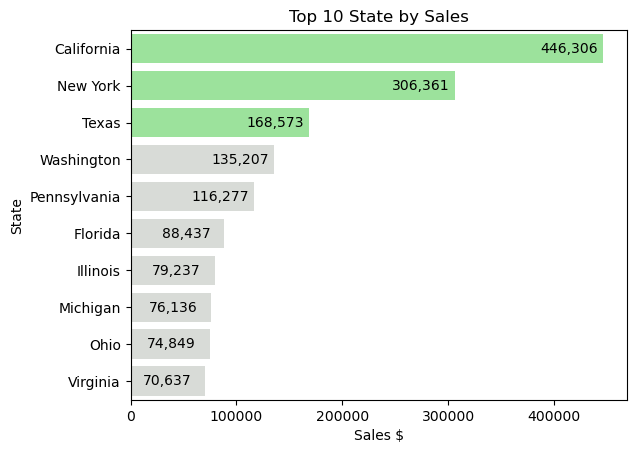

In [16]:
ax = sns.barplot(y=state_sales.index[:10], x=state_sales.values[:10], orient= 'h', palette=warna)
rects = ax.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = -45
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'

    label = '{:,.0f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords='offset points', 
        va='center',                
        ha=ha,                      
        color = 'black')            

            
tfrom = ax.get_xaxis_transform()
ann = ax.annotate(text=None, xy=(5, 1), xycoords=tfrom, bbox=dict(boxstyle='square,pad=1.3', fc='#f0f0f0', ec='none'))

plt.title('Top 10 State by Sales')
ax.set_xlabel('Sales $')

Insight:
- California is a global technology hub and home to many leading technology companies. In addition, California residents often have higher incomes than the national average, allowing them to have a larger budget for purchasing technology products.

In [17]:
x['delivery']= x['delivery'].dt.days

In [18]:
data= x[x['delivery']>=0]
data.head()

Order Date  Ship Date       Ship Mode Customer ID  Customer Name  \
0  2017-08-11 2017-11-11    Second Class    CG-12520    Claire Gute   
1  2017-08-11 2017-11-11    Second Class    CG-12520    Claire Gute   
12 2018-04-15 2018-04-20  Standard Class    AA-10480   Andrew Allen   
13 2017-05-12 2017-10-12  Standard Class    IM-15070   Irene Maddox   
14 2016-11-22 2016-11-26  Standard Class    HP-14815  Harold Pawlan   

        Segment        Country        City           State   Region  ...  \
0      Consumer  United States   Henderson        Kentucky    South  ...   
1      Consumer  United States   Henderson        Kentucky    South  ...   
12     Consumer  United States     Concord  North Carolina    South  ...   
13     Consumer  United States     Seattle      Washington     West  ...   
14  Home Office  United States  Fort Worth           Texas  Central  ...   

   Sub-Category                                       Product Name    Sales  \
0     Bookcases                  Bush Somerset Collection Bookcase  261.960   
1        Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.940   
12        Paper                                         Xerox 1967   15.552   
13      Binders        Fellowes PB200 Plastic Comb Binding Machine  407.976   
14   Appliances  Holmes Replacement Filter for HEPA Air Cleaner...   68.810   

   Order_Day  Order_Month Order_Year ord_day  ship_day  delivery  Year_month  
0     Friday       August       2017      11        11        92  2017-08-01  
1     Friday       August       2017      11        11        92  2017-08-01  
12    Sunday        April       2018      15        20         5  2018-04-01  
13    Friday          May       2017      12        12       153  2017-05-01  
14   Tuesday     November       2016      22        26         4  2016-11-01  

[5 rows x 22 columns]

In [19]:
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['Order_Day'] = pd.Categorical(data['Order_Day'], categories=day, ordered=True)

In [20]:
x['Month_order'] = x['Order Date'].dt.strftime('%B')
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
x['Month_order'] = pd.Categorical(x['Month_order'], categories=months, ordered=True)

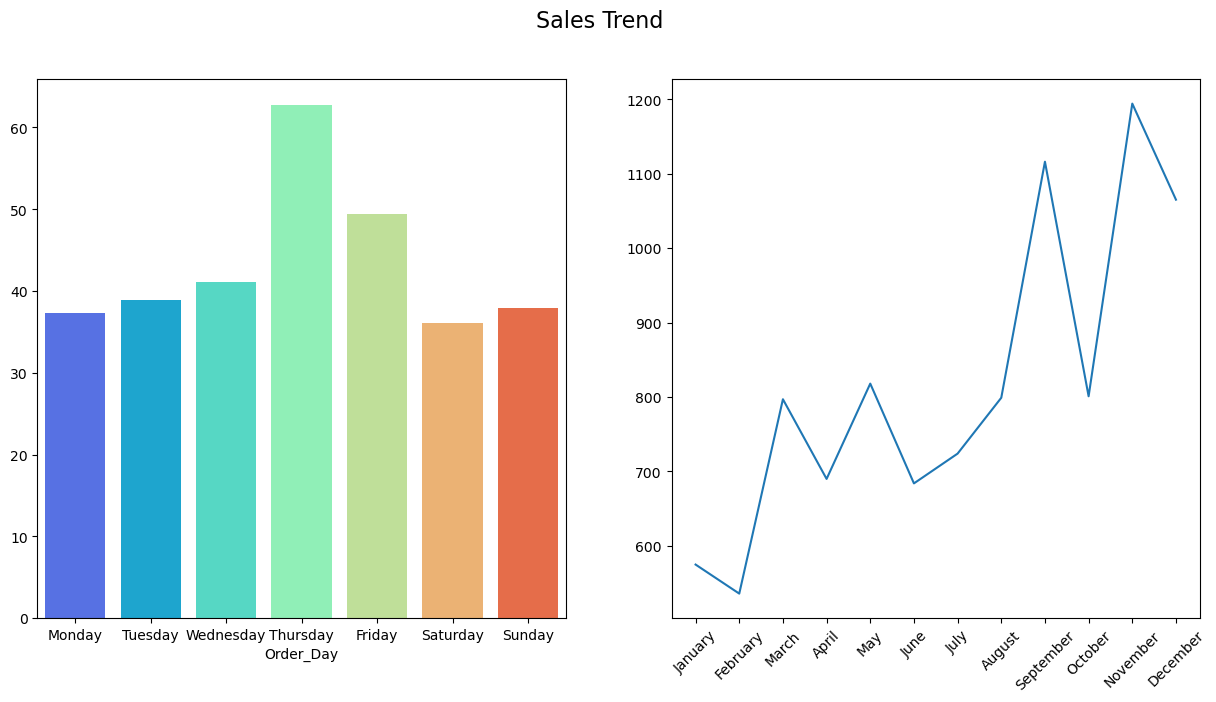

In [21]:
po= data.groupby('Order_Day')['delivery'].mean()
bulan = x.groupby('Month_order').size()
fig, (ax1,ax2)= plt.subplots(1,2, figsize=(15,7))
sns.barplot(x= po.index, y=po.values, palette= 'rainbow', ax= ax1)
ax2 = plt.plot(bulan.index, bulan.values)
ax2 =plt.xticks(rotation=45)
fig.suptitle('Sales Trend', fontsize=16);

Insight:
- Promotions and Discounts: Many stores and shopping centers often offer significant promotions and discounts on Thursdays, which can attract many buyers. For example, some stores may offer massive discounts on Thursdays in preparation for the weekend.
- **November** receives the highest revenue due to Thanksgiving Day, a national holiday in the United States celebrated on the fourth Thursday of November. Black Friday and preparations for Christmas and New Year's also contribute to the high revenue.
- **February** earns the least revenue due to the winter season and the absence of significant national holidays. Unlike Thanksgiving Day or Christmas Day, which can increase demand for specific products and generate sales during those months, February lacks such holidays. Additionally, there is typically a decline in demand after the holiday season.
- **October** experiences a decline in revenue due to the end of summer, as people return to their daily routines.

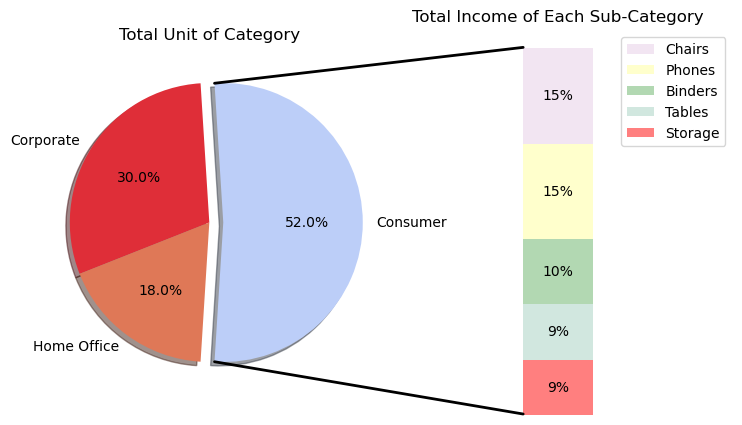

In [22]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
p=[]
for i in range(len(x['Segment'].value_counts())):
               value= (x['Segment'].value_counts().values[i]/x.shape[0]).round(2)
               p.append(value)
overall_ratios = p
labels= x['Segment'].unique()
explode = [0.1, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle, colors= ['#BCCEF8', '#DF2E38', '#DF7857'],
                     shadow= True, labels=labels, explode=explode)
ax1.set_title('Total Unit of Category')

# bar chart parameters
c=x[x['Segment']== 'Consumer']
product= c.groupby('Sub-Category')['Sales'].sum().sort_values(ascending= False)
sub=[]
for i in range(len(product)):
               value= (product.values[i]/sum(product.values).round(2))
               sub.append(value)
category = sub[:5]
sub_labels =product.index
bottom = 0.57
width = .1

# Adding from the top matches the legend.

for j, (height, label) in enumerate(([*zip(category, sub_labels)])):
    bottom -= height
    colors = ["purple", "yellow", "green", "#8EC3B0", 'r']
    bc = ax2.bar(0, height, width, bottom=bottom, color=colors[j], label=label,
                 alpha=0.1 + 0.1 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Total Income of Each Sub-Category')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(category)

# draw top connecting line
x0 = r * np.cos(np.pi / 180 * theta2) + center[0]
y0 = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x0, y0), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# draw bottom connecting line
x1 = r * np.cos(np.pi / 180 * theta1) + center[0]
y1 = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x1, y1), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)

plt.show()

Insight:
- The most popular product in the consumer category has generated the highest revenue among several sub-categories. We can see that the product **phone** is within this range, which means that each year it has the potential to increase profits for the company with various marketing campaigns.

In [23]:
import matplotlib as mpl
import numpy as np

plot_title = 'Top 10 Sub Category by Delivery Time,Days'
title_size = 18
x_label = 'Sales $'

Text(0.5, 1.0, 'Top 10 Sub-Category by Sales')

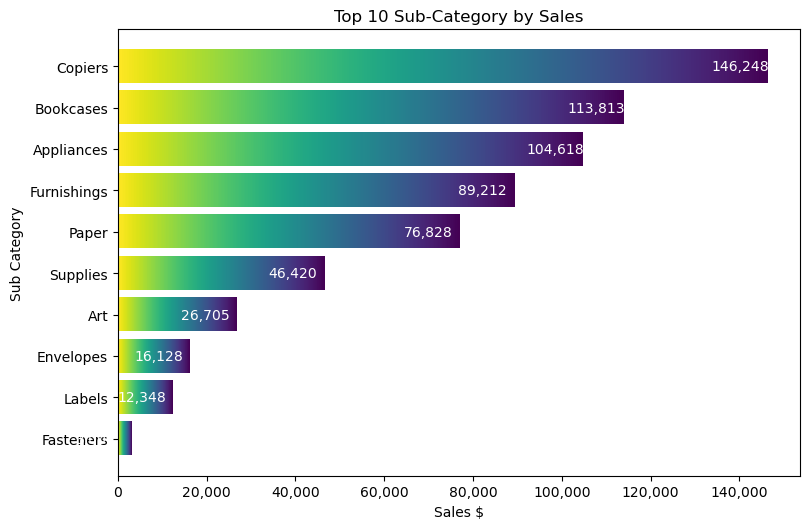

In [24]:
sales= df.groupby('Sub-Category')['Sales'].sum().sort_values()[:10].round(2)
fig, ax = plt.subplots(figsize=(8,5))
mpl.pyplot.viridis()
        
bar = ax.barh(sales.index, sales.values)
plt.tight_layout()
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
        
        
ax.grid(zorder=0)

def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256))
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor('none')
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x+w, x, y, y+h], aspect='auto', zorder=1)
    ax.axis(lim)
gradientbars(bar)

        
rects = ax.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = -40
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'

    label = '{:,.0f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords='offset points', 
        va='center',                
        ha=ha,                      
        color = 'white')            

            
tfrom = ax.get_xaxis_transform()
ann = ax.annotate(text=None, xy=(5, 1), xycoords=tfrom, bbox=dict(boxstyle='square,pad=1.3', fc='#f0f0f0', ec='none'))

ax.set_xlabel(x_label)
ax.set_ylabel('Sub Category')
plt.grid(False)
plt.title('Top 10 Sub-Category by Sales')      

Insight:
- The copiers generate the most revenue due to the increasing demand for office supplies​.

In [25]:
product_daily = x.groupby([pd.Grouper(key= 'Order Date', freq='Q'), 
                                  'Sub-Category'])[['Sub-Category']].count().rename(columns={'Sub-Category': 'Sold'}).reset_index()
product_daily.sort_values(by='Sold', ascending=False)

Order Date Sub-Category  Sold
257 2018-12-31      Binders   141
240 2018-09-30      Binders   131
190 2017-12-31      Binders   130
266 2018-12-31        Paper   127
249 2018-09-30        Paper   118
..         ...          ...   ...
142 2017-03-31      Copiers     3
23  2015-06-30      Copiers     2
6   2015-03-31      Copiers     2
74  2016-03-31      Copiers     2
57  2015-12-31      Copiers     1

[271 rows x 3 columns]

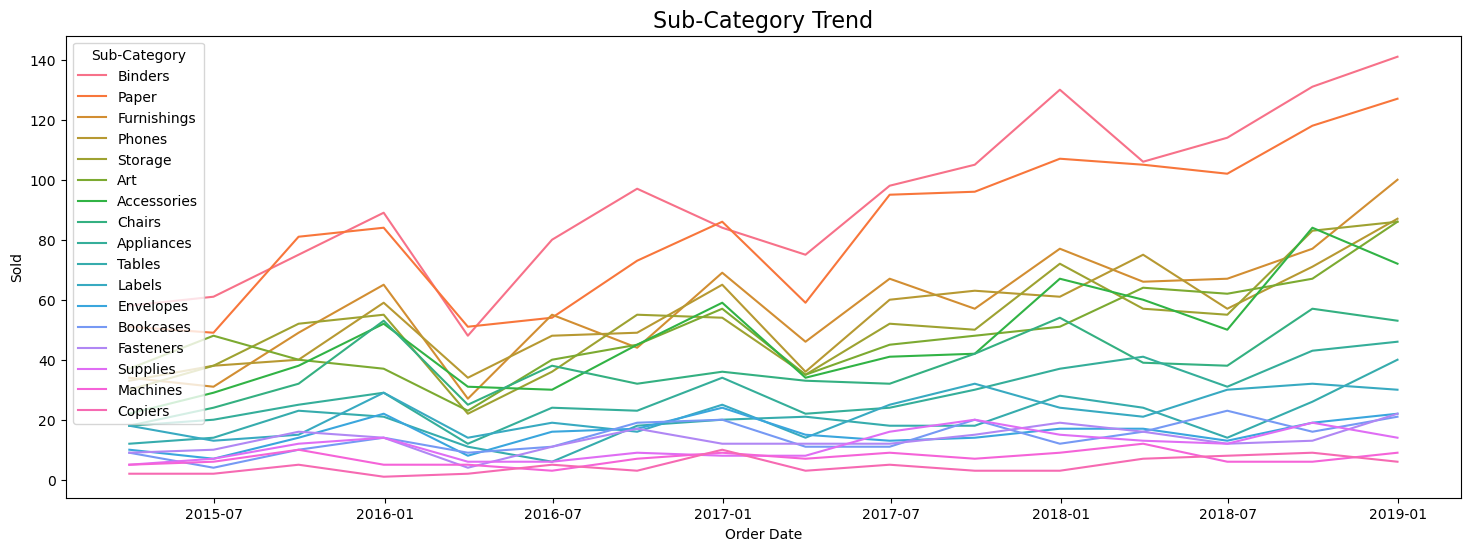

In [26]:
plt.figure(figsize=(18, 6))
sns.lineplot(data= product_daily.sort_values(by='Sold', ascending=False), 
             x= 'Order Date', y= 'Sold', hue= 'Sub-Category')
plt.title('Sub-Category Trend', fontsize=16)
plt.show()

Insight: 
- **Binders and paper** became the most sought-after items from 2015-2018 due to an increase in business and office activity. During this period, the US economy was growing steadily with an increase in employment. This could lead to increased business and office activity, which in turn could drive demand for office products

In [27]:
trend_sales = x.copy()
trend_sales = trend_sales.set_index('Order Date')
trend_sales = pd.DataFrame(trend_sales.resample('W')['Product Name'].count())
trend_sales = trend_sales.rename(columns={'Product Name' : 'Product Sold'}).reset_index()
trend_sales.head(10)

Order Date  Product Sold
0 2015-01-04            15
1 2015-01-11            43
2 2015-01-18            30
3 2015-01-25            22
4 2015-02-01            16
5 2015-02-08            23
6 2015-02-15            46
7 2015-02-22            10
8 2015-03-01             6
9 2015-03-08            22

# <center><div style="font-family: Trebuchet MS; background-color: #57C5B6; color: #2D2926; padding: 12px; line-height: 1;">The Models</div></center>

## <left><div style="font-family: Trebuchet MS; background-color: #F5C6EC; color: #2D2926; padding: 12px; line-height: 1;">1. Prophet</div></left>

In [28]:
fc = x.copy()
fc = fc[['Order Date','Sales']]
fc = fc.set_index('Order Date')
fc = pd.DataFrame(fc.resample('M')['Sales'].sum().round(2))

In [29]:
fc.reset_index()

Order Date     Sales
0  2015-01-31  28828.25
1  2015-02-28  12588.48
2  2015-03-31  54027.69
3  2015-04-30  24428.64
4  2015-05-31  29520.49
5  2015-06-30  29181.33
6  2015-07-31  35194.56
7  2015-08-31  37349.27
8  2015-09-30  65956.40
9  2015-10-31  34561.95
10 2015-11-30  64369.46
11 2015-12-31  63568.31
12 2016-01-31  29347.39
13 2016-02-29  20728.35
14 2016-03-31  34489.68
15 2016-04-30  38056.97
16 2016-05-31  30761.56
17 2016-06-30  28515.91
18 2016-07-31  28573.31
19 2016-08-31  49076.93
20 2016-09-30  65353.00
21 2016-10-31  31631.89
22 2016-11-30  50009.14
23 2016-12-31  52891.88
24 2017-01-31  38048.18
25 2017-02-28  48907.59
26 2017-03-31  48990.14
27 2017-04-30  42368.05
28 2017-05-31  64836.25
29 2017-06-30  37424.68
30 2017-07-31  41761.94
31 2017-08-31  45766.81
32 2017-09-30  40692.31
33 2017-10-31  52156.96
34 2017-11-30  66392.55
35 2017-12-31  72847.09
36 2018-01-31  59767.09
37 2018-02-28  48928.83
38 2018-03-31  74748.62
39 2018-04-30  37849.22
40 2018-05-31  40882.45
41 2018-06-30  46912.85
42 2018-07-31  53942.78
43 2018-08-31  75408.78
44 2018-09-30  73153.36
45 2018-10-31  65501.16
46 2018-11-30  87997.64
47 2018-12-31  56959.24

### Train Test Split, test size = 0.2

In [30]:
fc.head()

Sales
Order Date          
2015-01-31  28828.25
2015-02-28  12588.48
2015-03-31  54027.69
2015-04-30  24428.64
2015-05-31  29520.49

In [31]:
tts = int(len(fc)*0.8)
train_data = fc.iloc[:tts]
test_data = fc.iloc[tts:]
print(f"Number of weeks in train data: {len(train_data)}")
print(f"Number of weeks in test data: {len(test_data)}")

Number of weeks in train data: 38
Number of weeks in test data: 10


### Fitting the Model

In [32]:
train_data = train_data.reset_index()
train_data.columns = ['ds', 'y']
train_data

ds         y
0  2015-01-31  28828.25
1  2015-02-28  12588.48
2  2015-03-31  54027.69
3  2015-04-30  24428.64
4  2015-05-31  29520.49
5  2015-06-30  29181.33
6  2015-07-31  35194.56
7  2015-08-31  37349.27
8  2015-09-30  65956.40
9  2015-10-31  34561.95
10 2015-11-30  64369.46
11 2015-12-31  63568.31
12 2016-01-31  29347.39
13 2016-02-29  20728.35
14 2016-03-31  34489.68
15 2016-04-30  38056.97
16 2016-05-31  30761.56
17 2016-06-30  28515.91
18 2016-07-31  28573.31
19 2016-08-31  49076.93
20 2016-09-30  65353.00
21 2016-10-31  31631.89
22 2016-11-30  50009.14
23 2016-12-31  52891.88
24 2017-01-31  38048.18
25 2017-02-28  48907.59
26 2017-03-31  48990.14
27 2017-04-30  42368.05
28 2017-05-31  64836.25
29 2017-06-30  37424.68
30 2017-07-31  41761.94
31 2017-08-31  45766.81
32 2017-09-30  40692.31
33 2017-10-31  52156.96
34 2017-11-30  66392.55
35 2017-12-31  72847.09
36 2018-01-31  59767.09
37 2018-02-28  48928.83

In [33]:
fc = fc.reset_index()
fc.columns = ['ds', 'y']

In [34]:
# instantiate a new Prophet object
new_model = Prophet(seasonality_mode='multiplicative', seasonality_prior_scale=15)

# fit the new model with the new data
new_model.fit(train_data)


22:25:49 - cmdstanpy - INFO - Chain [1] start processing
22:25:50 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
new_model.component_modes

{'additive': ['additive_terms', 'extra_regressors_additive'],
 'multiplicative': ['yearly',
  'multiplicative_terms',
  'extra_regressors_multiplicative',
  'holidays']}

In [36]:
future_data = new_model.make_future_dataframe(periods=10, freq='M')

predict = new_model.predict(future_data)
predict

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  2015-01-31  33517.091803  18840.032592  38834.914517  33517.091803   
1  2015-02-28  33947.056845  13503.431335  33929.356759  33947.056845   
2  2015-03-31  34423.089571  42000.605291  62779.267066  34423.089571   
3  2015-04-30  34883.766402  14099.462650  33753.996907  34883.766402   
4  2015-05-31  35359.799128  26233.111226  46394.085796  35359.799128   
5  2015-06-30  35820.475959  17786.983843  39317.708526  35820.475959   
6  2015-07-31  36296.508684  23113.338962  43626.257248  36296.508684   
7  2015-08-31  36772.541410  20354.305562  41675.222878  36772.541410   
8  2015-09-30  37233.218242  40442.493191  61012.310102  37233.218242   
9  2015-10-31  37709.250968  21353.126279  41993.010204  37709.250968   
10 2015-11-30  38169.927800  47655.205190  68890.880797  38169.927800   
11 2015-12-31  38645.960526  48930.766969  69490.793706  38645.960526   
12 2016-01-31  39121.993253  18886.822411  40142.888376  39121.993253   
13 2016-02-29  39567.314190  26005.650354  46328.264961  39567.314190   
14 2016-03-31  40043.346917  25666.090419  45632.765017  40043.346917   
15 2016-04-30  40504.023749  29639.494133  50230.347263  40504.023749   
16 2016-05-31  40980.056476  33073.439503  54386.132424  40980.056476   
17 2016-06-30  41440.733309  20758.577839  41877.880559  41440.733309   
18 2016-07-31  41916.766036  22344.823784  42941.349283  41916.766036   
19 2016-08-31  42392.798764  38679.028238  59428.237801  42392.798764   
20 2016-09-30  42853.475597  43194.301536  63911.887124  42853.475597   
21 2016-10-31  43329.508324  31636.634045  52743.611401  43329.508324   
22 2016-11-30  43790.185157  44993.742508  65599.664407  43790.185157   
23 2016-12-31  44266.217885  48793.547122  69609.568643  44266.217885   
24 2017-01-31  44742.250612  40033.895543  60013.140596  44742.250612   
25 2017-02-28  45172.215657  26310.064844  48129.276510  45172.215657   
26 2017-03-31  45648.248385  38842.044822  60013.203089  45648.248385   
27 2017-04-30  46108.925219  30541.302168  51470.109753  46108.925219   
28 2017-05-31  46584.957947  38139.029901  59270.591312  46584.957947   
29 2017-06-30  47045.634781  25341.323557  46168.113986  47045.634781   
30 2017-07-31  47521.667510  29387.875294  50279.071378  47521.667510   
31 2017-08-31  47997.700239  40134.679856  61473.997092  47997.700239   
32 2017-09-30  48458.377073  51669.835579  73317.928637  48458.377073   
33 2017-10-31  48934.409802  35863.502118  56746.680219  48934.409802   
34 2017-11-30  49395.086636  56812.173497  76856.906611  49395.086636   
35 2017-12-31  49871.119365  60188.304384  80710.954095  49871.119365   
36 2018-01-31  50347.152093  39018.257544  60144.573800  50347.152093   
37 2018-02-28  50777.117139  28604.754898  49410.100397  50777.117139   
38 2018-03-31  51253.149867  56664.850223  77512.602214  51253.149855   
39 2018-04-30  51713.826701  30930.710455  53044.503838  51713.826662   
40 2018-05-31  52189.859430  43634.253654  64062.553969  52189.859354   
41 2018-06-30  52650.536264  30874.919394  51815.947061  52650.536143   
42 2018-07-31  53126.568993  36806.800701  58272.879675  53126.568823   
43 2018-08-31  53602.601722  40936.439206  60812.660533  53602.601497   
44 2018-09-30  54063.278556  61579.902795  82699.941959  54063.278275   
45 2018-10-31  54539.311285  37434.124677  58730.668772  54539.310942   
46 2018-11-30  54999.988119  67616.368884  89925.582957  54999.987703   
47 2018-12-31  55476.020848  71128.291829  91626.727841  55476.020365   

     trend_upper  multiplicative_terms  multiplicative_terms_lower  \
0   33517.091803             -0.134513                   -0.134513   
1   33947.056845             -0.300506                   -0.300506   
2   34423.089571              0.509631                    0.509631   
3   34883.766402             -0.295477                   -0.295477   
4   35359.799128              0.019790                    0.019790   
5   35820.475

In [37]:
plot_plotly(new_model, predict)

In [38]:
train_data1 = train_data.copy()
train_data1 = train_data1.set_index('ds')
train_data1 = pd.DataFrame(train_data1.resample('M').sum()['y'])
predict1 = predict.copy()
predict1 = predict1.set_index('ds')
predict1 = pd.DataFrame(predict1.resample('M').sum()['yhat'])
test_data1 = test_data.copy()
#test_data1 = test_data1.set_index('Order Date')
test_data1 = pd.DataFrame(test_data1.resample('M').sum()['Sales'])

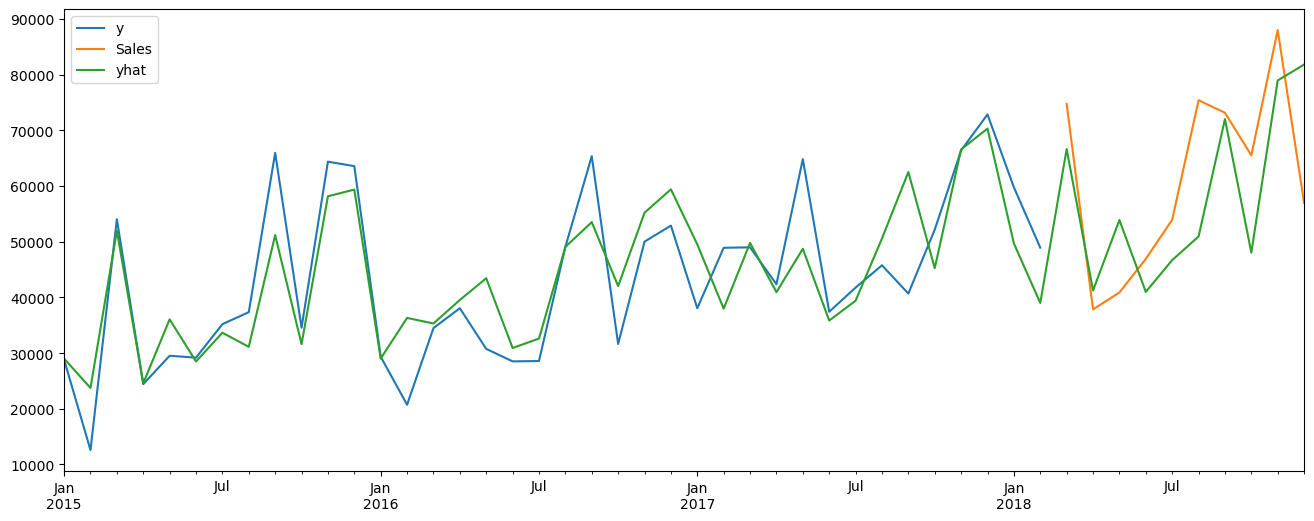

In [39]:
result = pd.concat([train_data1['y'], test_data1['Sales'], predict1['yhat']], axis=1)

result.plot(figsize= (16, 6))
plt.show()

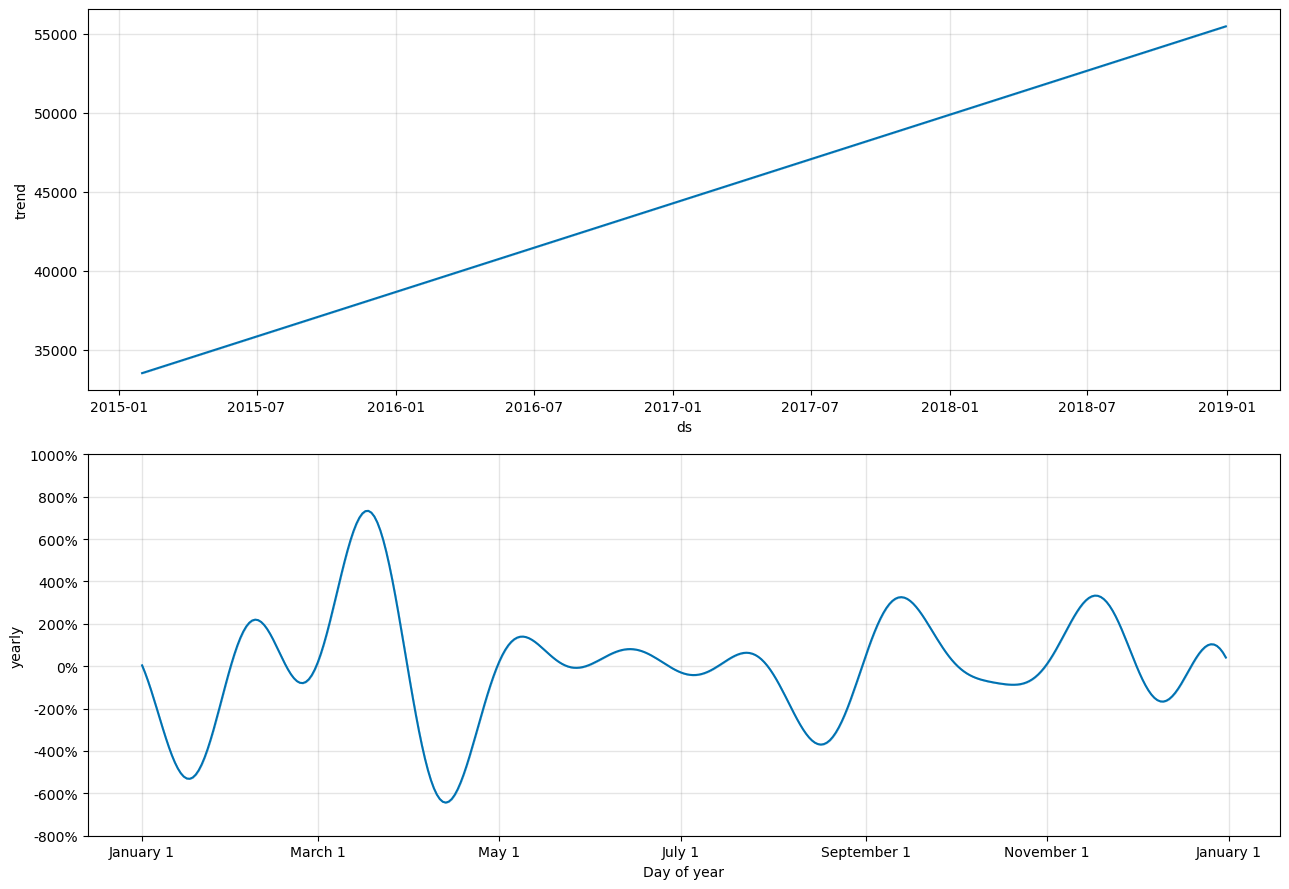

In [40]:
new_model.plot_components(predict, figsize=(13, 9));

### Model Evaluation

### SKLearn

In [41]:
predictions= predict.iloc[38:]['yhat']

In [42]:
predictions.shape

(10,)

In [43]:
test_data.shape

(10, 1)

In [44]:
mape_prophet= mean_absolute_percentage_error(test_data, predictions)

In [45]:
mape_prophet

0.19229568782226325

### Cross Validation Prophet

In [46]:
from prophet.diagnostics import cross_validation, performance_metrics
cv_result = cross_validation(new_model,initial='2Y', period='150D' ,horizon= '300D')

  0%|          | 0/1 [00:00<?, ?it/s]

22:25:51 - cmdstanpy - INFO - Chain [1] start processing
22:25:52 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
cv_result

ds          yhat    yhat_lower    yhat_upper         y     cutoff
0 2017-05-31  33371.392900  27173.305167  39597.533028  64836.25 2017-05-04
1 2017-06-30  31847.705243  25529.713936  37846.834279  37424.68 2017-05-04
2 2017-07-31  34582.341398  28196.581754  41109.028067  41761.94 2017-05-04
3 2017-08-31  50384.602129  44467.683730  56450.970704  45766.81 2017-05-04
4 2017-09-30  73240.592036  67275.865136  79098.290294  40692.31 2017-05-04
5 2017-10-31  37014.297674  31129.146350  42880.017240  52156.96 2017-05-04
6 2017-11-30  61690.954517  55362.434558  68000.936593  66392.55 2017-05-04
7 2017-12-31  63362.978118  56999.341430  69432.980727  72847.09 2017-05-04
8 2018-01-31  39444.160543  32776.066285  45680.341419  59767.09 2017-05-04
9 2018-02-28  28268.981352  22028.014178  34759.659042  48928.83 2017-05-04

In [48]:
performance = performance_metrics(cv_result)
performance.head()

horizon           mse          rmse           mae      mape     mdape  \
0  27 days  9.900372e+08  31464.857100  31464.857100  0.485297  0.485297   
1  57 days  3.110265e+07   5576.974757   5576.974757  0.149019  0.149019   
2  88 days  5.154664e+07   7179.598602   7179.598602  0.171917  0.171917   
3 119 days  2.132400e+07   4617.792129   4617.792129  0.100898  0.100898   
4 149 days  1.059391e+09  32548.282036  32548.282036  0.799863  0.799863   

      smape  coverage  
0  0.640782       0.0  
1  0.161016       1.0  
2  0.188085       0.0  
3  0.096053       1.0  
4  0.571359       0.0

In [49]:
mape_prophetcv= performance['mape'].mean()
mape_prophetcv

0.29606088516226114

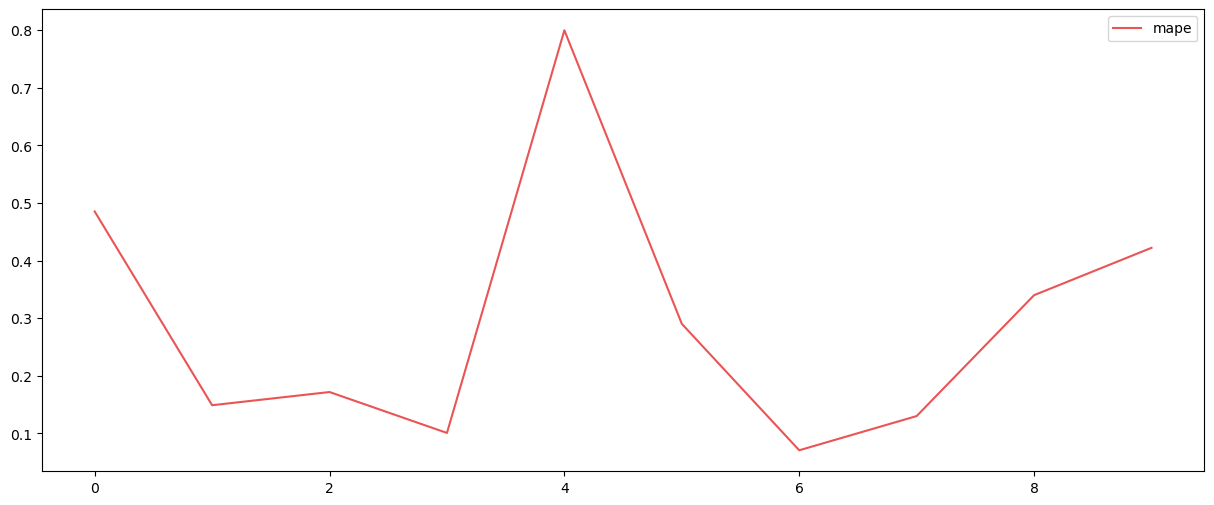

In [50]:
evaluation = performance.set_index('horizon')
performance[['mape']].plot(figsize=(15,6), color='#EA5455')
plt.show()

### Forecast 3 Months using Prophet

In [51]:
model1 = Prophet()
model1 = model1.fit(fc)
future = model1.make_future_dataframe(periods = 3,freq = 'M')

22:25:52 - cmdstanpy - INFO - Chain [1] start processing
22:25:53 - cmdstanpy - INFO - Chain [1] done processing


In [52]:
prediction = model1.predict(future)

In [53]:
from prophet.plot import plot_plotly

plot_plotly(model1, prediction)

In [54]:
fc1 = fc.copy()
fc1 = fc1.set_index('ds')
fc1 = pd.DataFrame(fc1.resample('M').sum()['y'])
prediction1 = prediction.copy()
prediction1 = prediction1.set_index('ds')
prediction1 = pd.DataFrame(prediction1.resample('M').sum()['yhat'])

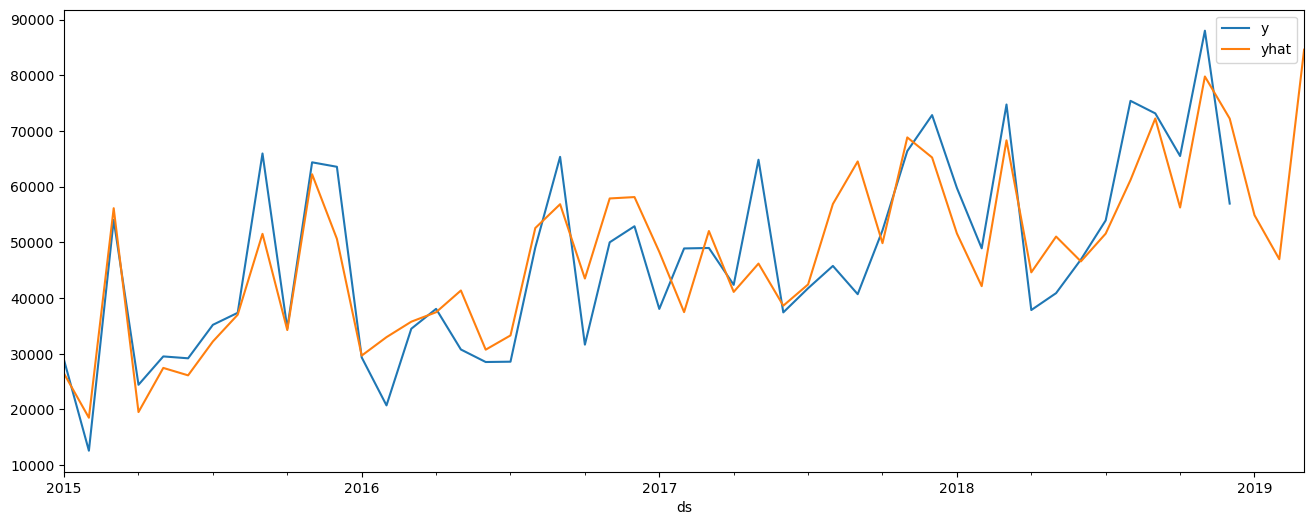

In [55]:
result = pd.concat([fc1['y'], prediction1['yhat']], axis=1)

result.plot(figsize= (16, 6))
plt.show()

## <left><div style="font-family: Trebuchet MS; background-color: #F5C6EC; color: #2D2926; padding: 12px; line-height: 1;"> 2.Holt-Winters - Exponential Smoothing</div></left>

In [56]:
fc = x.copy()
fc = fc[['Order Date','Sales']]
fc = fc.set_index('Order Date')
fc = pd.DataFrame(fc.resample('M')['Sales'].sum().round(2))

In [57]:
fc.head()

Sales
Order Date          
2015-01-31  28828.25
2015-02-28  12588.48
2015-03-31  54027.69
2015-04-30  24428.64
2015-05-31  29520.49

### adfuller

In [58]:
from statsmodels.tsa.stattools import adfuller
print('Dickey Fuller Test Results')
test_df = adfuller(fc.iloc[:,0].values,autolag='AIC')
df_output = pd.Series(test_df[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observation Used'])
for key,value in test_df[4].items():
    df_output['Critical value (%s)'%key] = value
print(df_output)

Dickey Fuller Test Results
Test Statistic                -1.147653
p-value                        0.695699
Lags Used                      7.000000
Number of Observation Used    40.000000
Critical value (1%)           -3.605565
Critical value (5%)           -2.937069
Critical value (10%)          -2.606986
dtype: float64


Test Statistic: nilai test statistic untuk Dickey Fuller Test yang diberikan adalah -4.146005. Nilai ini menunjukkan seberapa jauh sampel statistik (dalam hal ini seri waktu) berbeda dari hipotesis nol. Semakin besar nilai test statistic, semakin kuat bukti untuk menolak hipotesis nol bahwa data memiliki unit root dan tidak stationary. Dalam kasus ini, nilai test statistic negatif dan besar, sehingga memberikan bukti yang cukup kuat untuk menolak hipotesis nol.

P-value: nilai p-value dari Dickey Fuller Test yang diberikan adalah 0.000812. Nilai ini menunjukkan probabilitas mendapatkan nilai test statistic yang sama atau lebih ekstrem daripada yang diobservasi jika hipotesis nol adalah benar. Semakin kecil nilai p-value, semakin kuat bukti untuk menolak hipotesis nol. Dalam kasus ini, nilai p-value sangat kecil (kurang dari 0.05), sehingga memberikan bukti yang cukup kuat untuk menolak hipotesis nol.

Lags Used: jumlah lags atau lag order yang digunakan dalam uji Dickey Fuller. Dalam kasus ini, digunakan 4 lags dalam uji Dickey Fuller.

Number of Observation Used: jumlah observasi atau periode waktu yang digunakan dalam uji Dickey Fuller. Dalam kasus ini, digunakan 204 observasi dalam uji Dickey Fuller.

Critical Values: nilai kritis atau batas kritis yang digunakan untuk mengambil keputusan tentang menolak atau tidak menolak hipotesis nol. Batas kritis ini dapat berbeda-beda tergantung pada tingkat signifikansi yang digunakan. Dalam kasus ini, terdapat tiga batas kritis yang digunakan pada tingkat signifikansi 1%, 5%, dan 10%. Jika nilai test statistic kurang dari nilai kritis yang sesuai, maka hipotesis nol akan ditolak. Dalam kasus ini, nilai test statistic lebih kecil daripada nilai kritis pada semua tingkat signifikansi, sehingga hipotesis nol ditolak dan dapat disimpulkan bahwa deret waktu yang diuji tidak memiliki unit root dan stationary.

###decompose

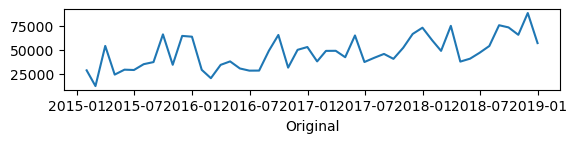

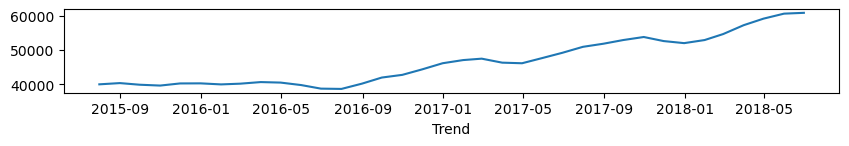

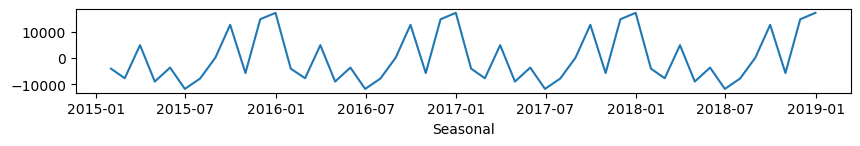

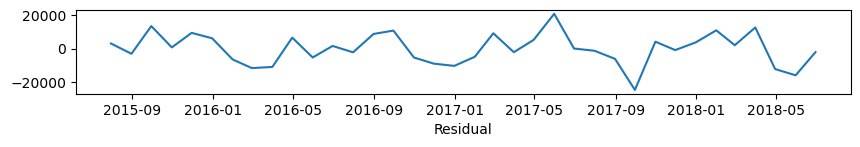

<Figure size 1000x500 with 0 Axes>

In [59]:
#Now we decompose the data
decomp= seasonal_decompose(fc)
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.subplot(411)
plt.plot(fc)
plt.xlabel('Original')
plt.figure(figsize=(10,5))

plt.subplot(412)
plt.plot(trend)
plt.xlabel('Trend')
plt.figure(figsize=(10,5))

plt.subplot(413)
plt.plot(seasonal)
plt.xlabel('Seasonal')
plt.figure(figsize=(10,5))

plt.subplot(414)
plt.plot(residual)
plt.xlabel('Residual')
plt.figure(figsize=(10,5))

plt.tight_layout()
plt.show();

### Ses

In [60]:
sales_res = fc.resample('M').sum()
sales_res

Sales
Order Date          
2015-01-31  28828.25
2015-02-28  12588.48
2015-03-31  54027.69
2015-04-30  24428.64
2015-05-31  29520.49
2015-06-30  29181.33
2015-07-31  35194.56
2015-08-31  37349.27
2015-09-30  65956.40
2015-10-31  34561.95
2015-11-30  64369.46
2015-12-31  63568.31
2016-01-31  29347.39
2016-02-29  20728.35
2016-03-31  34489.68
2016-04-30  38056.97
2016-05-31  30761.56
2016-06-30  28515.91
2016-07-31  28573.31
2016-08-31  49076.93
2016-09-30  65353.00
2016-10-31  31631.89
2016-11-30  50009.14
2016-12-31  52891.88
2017-01-31  38048.18
2017-02-28  48907.59
2017-03-31  48990.14
2017-04-30  42368.05
2017-05-31  64836.25
2017-06-30  37424.68
2017-07-31  41761.94
2017-08-31  45766.81
2017-09-30  40692.31
2017-10-31  52156.96
2017-11-30  66392.55
2017-12-31  72847.09
2018-01-31  59767.09
2018-02-28  48928.83
2018-03-31  74748.62
2018-04-30  37849.22
2018-05-31  40882.45
2018-06-30  46912.85
2018-07-31  53942.78
2018-08-31  75408.78
2018-09-30  73153.36
2018-10-31  65501.16
2018-11-30  87997.64
2018-12-31  56959.24

<AxesSubplot:xlabel='Order Date'>

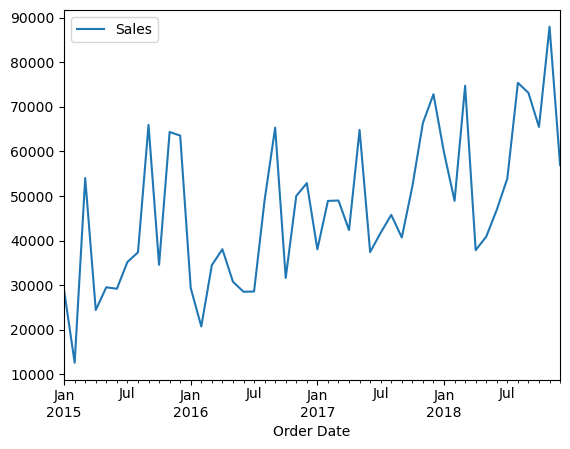

In [61]:
sales_res.plot()

In [62]:
# Simple Exponential Smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

df_ses = sales_res.copy()

model_ses = SimpleExpSmoothing(sales_res['Sales'])
fitted_model_ses = model_ses.fit(smoothing_level=0.9,optimized=False,use_brute=True) # bisa masukin alpha
df_ses['SES'] = fitted_model_ses.fittedvalues

df_ses.head()

Sales          SES
Order Date                       
2015-01-31  28828.25  28828.25000
2015-02-28  12588.48  28828.25000
2015-03-31  54027.69  14212.45700
2015-04-30  24428.64  50046.16670
2015-05-31  29520.49  26990.39267

Text(0.5, 1.0, 'Simple Exponential Smoothing')

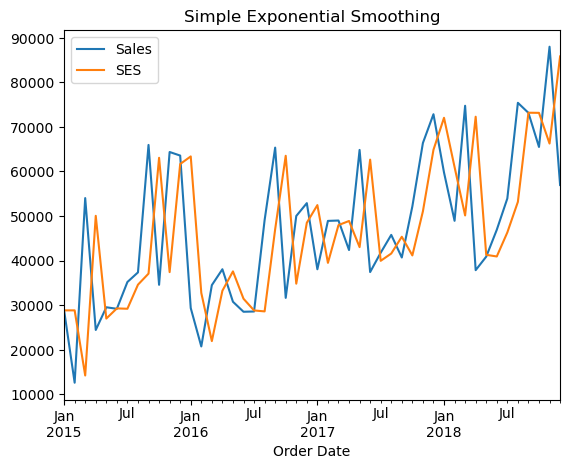

In [63]:
df_ses.plot()
plt.title('Simple Exponential Smoothing')

### ES

In [64]:
# Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df_es = sales_res.copy()

model = ExponentialSmoothing(sales_res['Sales'], trend = 'mul') 
fitted_model = model.fit()
df_es['ES'] = fitted_model.fittedvalues.shift(-1)

df_es.head()

Sales            ES
Order Date                        
2015-01-31  28828.25  28951.715956
2015-02-28  12588.48  25823.371645
2015-03-31  54027.69  39014.217721
2015-04-30  24428.64  38310.470018
2015-05-31  29520.49  39190.006345

Text(0.5, 1.0, 'Exponential Smoothing')

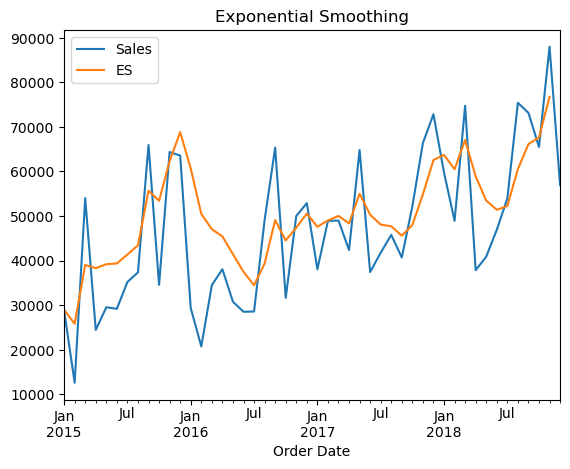

In [65]:
  df_es.plot()
  plt.title('Exponential Smoothing')

In [66]:
def exponential_smoothing(series, alpha):
    
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [67]:
def plotExponentialSmoothing(series, alphas):
    
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

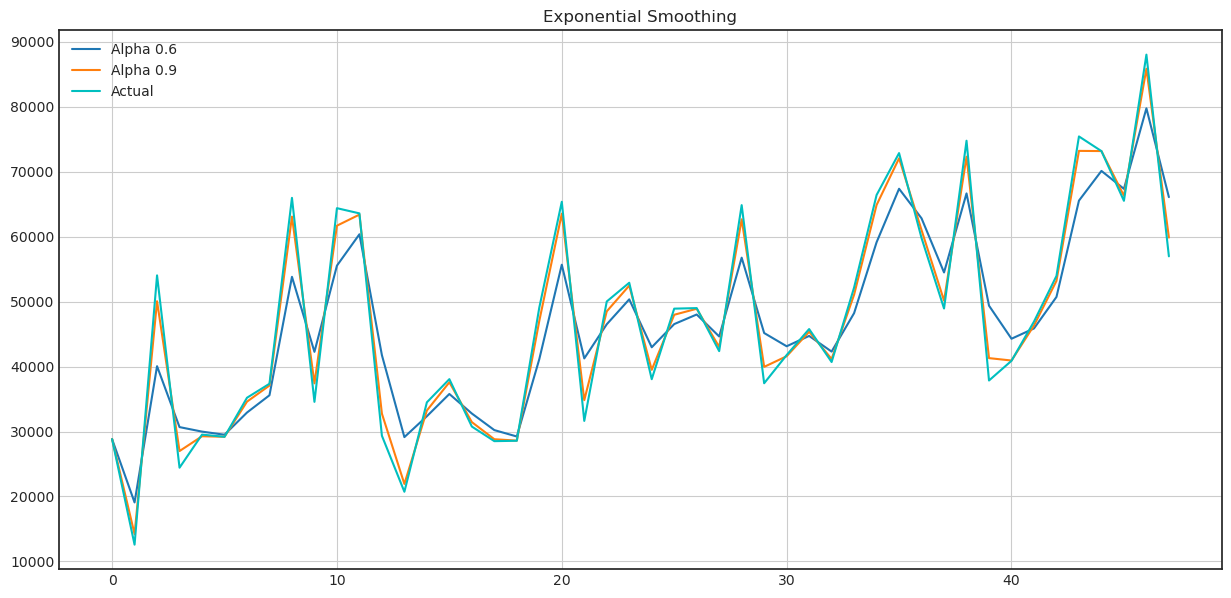

In [68]:
plotExponentialSmoothing(sales_res.Sales, [0.6, 0.9])

### Holt Winter

In [69]:
train_data = sales_res.iloc[:39]
test_data = sales_res.iloc[38:]

In [70]:
fitted_model = ExponentialSmoothing(train_data['Sales'],
                                   trend = 'mul',
                                   seasonal = 'add', 
                                   seasonal_periods = 12).fit()

In [71]:
test_predictions = fitted_model.forecast(10)

<AxesSubplot:xlabel='Order Date'>

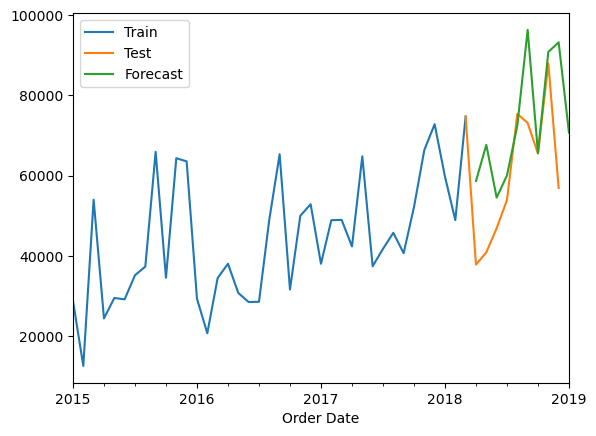

In [72]:
train_data['Sales'].plot(legend=True, label = 'Train',)
test_data['Sales'].plot(legend=True, label = 'Test')
test_predictions.plot(legend=True, label = 'Forecast')

In [73]:
print("Exponential Smoothing")
print("MAPE: ",mean_absolute_percentage_error(test_data,test_predictions))
print("")

Exponential Smoothing
MAPE:  0.303064577534024



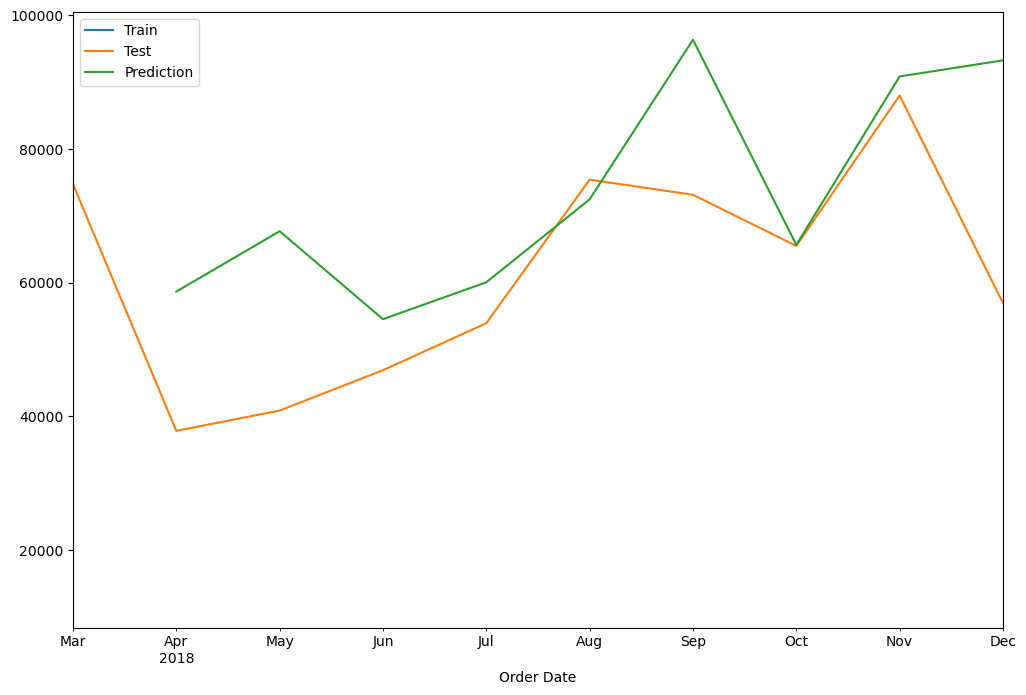

In [74]:
train_data['Sales'].plot(legend=True,label='Train')
test_data['Sales'].plot(legend=True,label='Test',figsize=(12,8))
test_predictions.plot(legend=True,label='Prediction',xlim=['2018-03-18','2018-12-30']);

In [75]:
final_model = ExponentialSmoothing(sales_res['Sales'],trend='mul',seasonal='add',seasonal_periods=12).fit()

In [76]:
forecast_predictions = final_model.forecast(3)

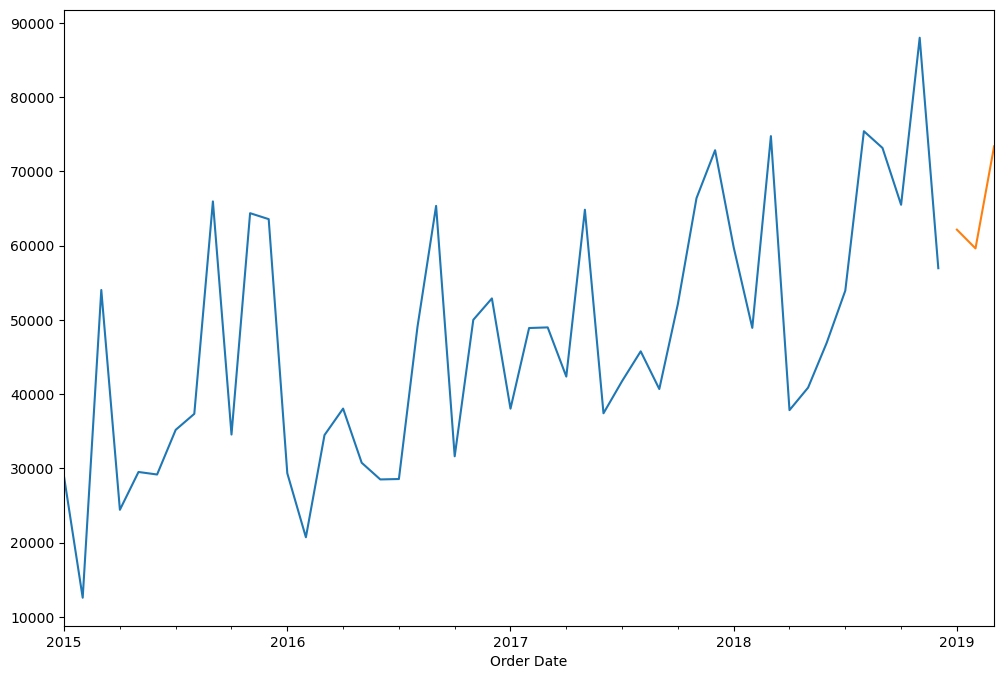

In [77]:
sales_res['Sales'].plot(figsize=(12,8))
forecast_predictions.plot();

## Evaluation Metrics of ES

In [78]:
mape_HW= mean_absolute_percentage_error(test_data,test_predictions)
mape_HW

0.303064577534024

## <left><div style="font-family: Trebuchet MS; background-color: #F5C6EC; color: #2D2926; padding: 12px; line-height: 1;"> 3. Auto Regressive</div></left>

In [79]:
train = fc.iloc[:38]
test = fc.iloc[38:]

In [80]:
train.shape,test.shape

((38, 1), (10, 1))

In [81]:
nlag = 12  # misalnya, menggunakan 12 lag waktu mundur


In [82]:
model = AutoReg(train['Sales'], lags=nlag)

In [83]:
AR1fit = model.fit()  

In [84]:
start=len(train)
end=len(train)+len(test)-1
predictions1 = AR1fit.predict(start=start, end=end).rename('Predictions')

In [85]:
predictions1

2018-03-31    49428.842723
2018-04-30    51054.271763
2018-05-31    66242.305093
2018-06-30    57893.667210
2018-07-31    57464.285264
2018-08-31    63880.490120
2018-09-30    56175.900187
2018-10-31    61033.717088
2018-11-30    68838.659251
2018-12-31    74978.750024
Freq: M, Name: Predictions, dtype: float64

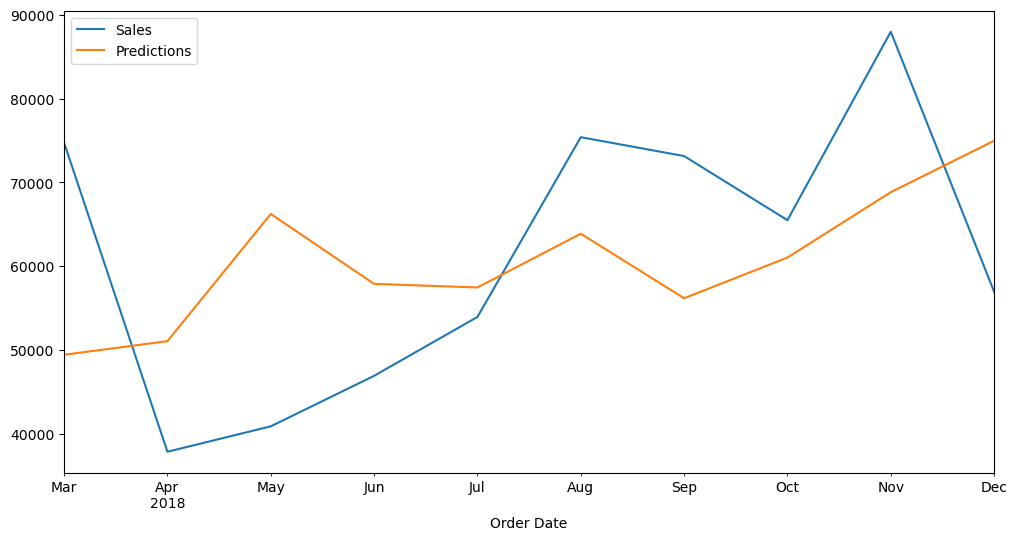

In [86]:
test['Sales'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6));

In [87]:
mape_AR= mean_absolute_percentage_error(test,predictions1)

In [88]:
mape_AR

0.25945214788393517

### Forecast using AR

In [89]:
model = AutoReg(fc['Sales'], lags=nlag)

In [90]:
ARfit = model.fit()

In [91]:
fcast = ARfit.predict(start=len(fc), end=len(fc)+3, dynamic=False).rename('Forecast')

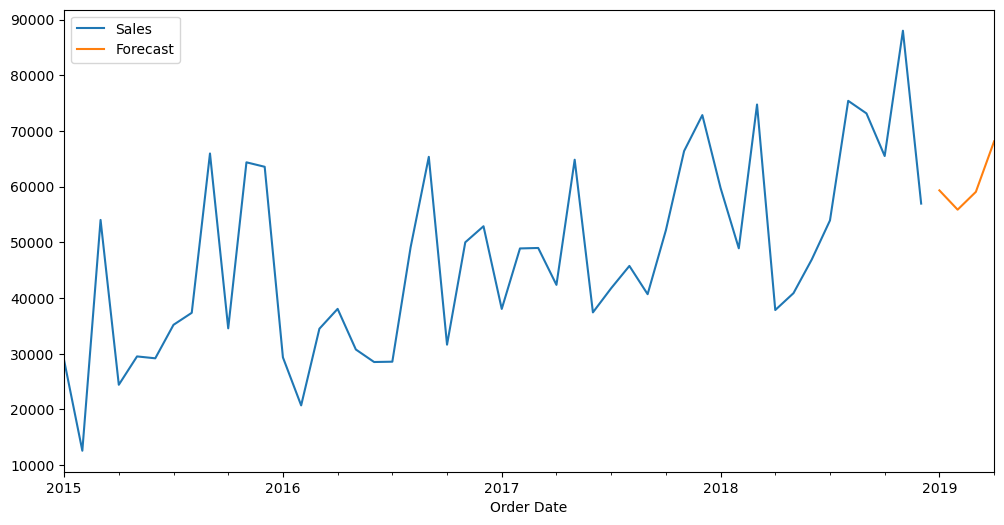

In [92]:
fc['Sales'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));

# Perbandingan ke 3 Model

In [93]:
mape_prophet

0.19229568782226325

In [94]:
tab = pd.DataFrame({'Method' : ['Prophet', 'Holt-Winters Exponential Smoothing', 'Auto Regressive' ],
                'MAPE Score' : [mape_prophet,  mape_HW, mape_AR]})
tab = tab.set_index('Method')
tab.style.highlight_min(color = 'lightgreen', axis = 0)

In [95]:
viz= prediction[48:]
viz= viz[['ds', 'yhat']]
viz['Month'] = viz['ds'].apply(lambda x: x.strftime('%B'))
viz

ds          yhat     Month
48 2019-01-31  54878.927892   January
49 2019-02-28  46972.657517  February
50 2019-03-31  84590.943857     March

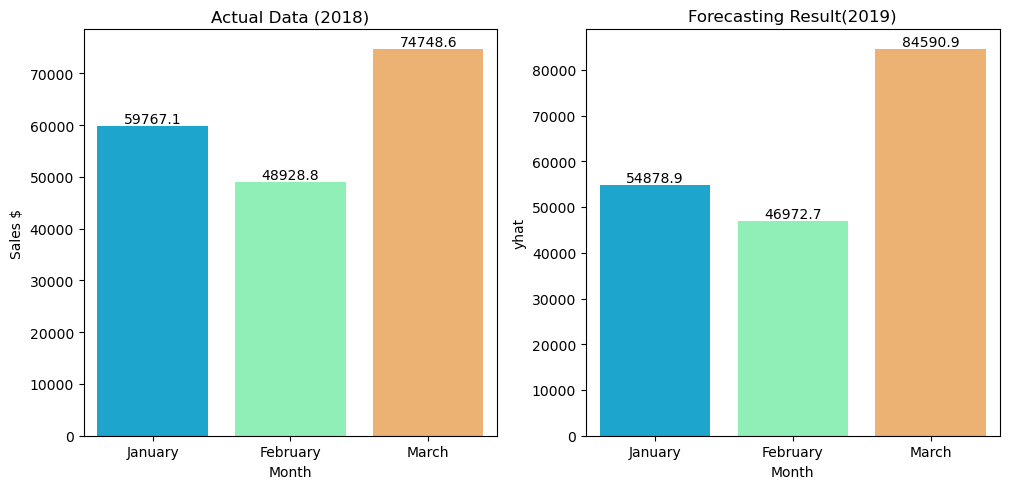

In [96]:
before= x[x['Order_Year']== 2018]
months = ['January','February','March']
before['Month_order'] = pd.Categorical(before['Month_order'], categories=months, ordered=True)
bulan = before.groupby('Month_order')['Sales'].sum().head(3)

fig, (ax1, ax2)= plt.subplots(1,2, figsize= (10,5))
sns.barplot(x= 'Month', y= 'yhat', data= viz, ci=None, palette= 'rainbow', ax= ax2)
sns.barplot(bulan.index, bulan.values, palette= 'rainbow', ax=ax1)
for i in ax2.containers:
    ax2.bar_label(i, label_type='edge')
for i in ax1.containers:
    ax1.bar_label(i, label_type='edge')    
ax2.set_title('Forecasting Result(2019)')
ax1.set_title('Actual Data (2018)')
plt.tight_layout()
ax1.set_xlabel('Month')
ax1.set_ylabel('Sales $');

In [97]:
revenue= viz['yhat'].sum().round(2)
revenue

186442.53

- **Revenue** for next 3 months Total is **186442.53 $**.

In [98]:
before1=before[['Order Date', 'Sales', 'Sub-Category', 'Order_Month']]

In [99]:
before1= before[before['Order_Month']== 'March']

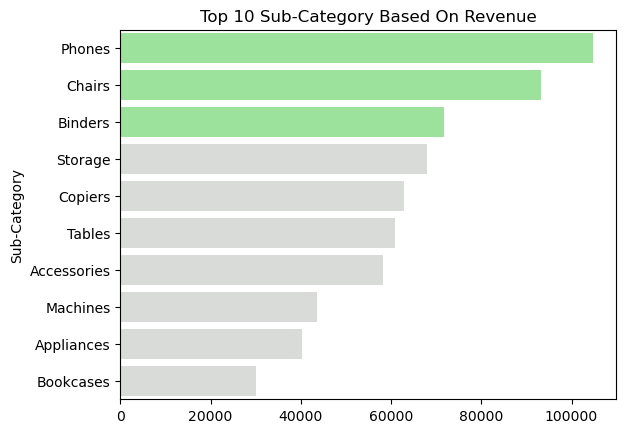

In [100]:
before2=before[['Order Date', 'Sales', 'Sub-Category', 'Order_Month','Segment']]
subcat= before.groupby('Sub-Category')['Sales'].sum().sort_values(ascending= False)[:10]
sns.barplot(y=subcat.index, x= subcat.values, palette= warna, orient= 'h')
plt.title('Top 10 Sub-Category Based On Revenue');

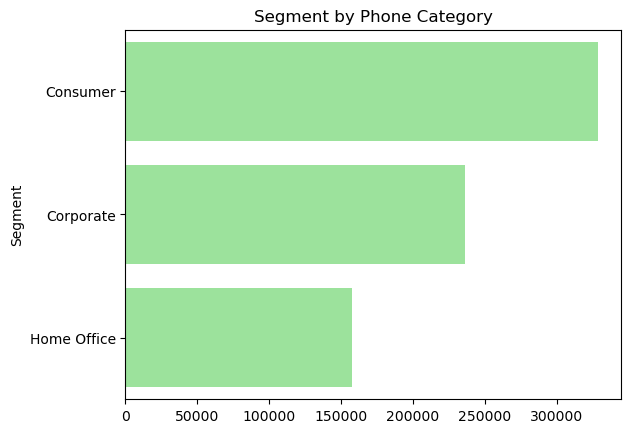

In [101]:
before3 = before2[before2['Sub-Category']== 'Phones']
subcat= before.groupby('Segment')['Sales'].sum().sort_values(ascending= False)[:10]
sns.barplot(y=subcat.index, x= subcat.values, palette= warna, orient= 'h')
plt.title('Segment by Phone Category');

Insight:

- In March 2018, it was observed that the Sub-Category Phones had the highest total sales, reaching over 100,000, where Phones falls under the Technologies category.
- Phones are needed in all segments, with the consumer segment having the highest sales. This indicates that Phones are highly demanded in all segments, especially by personal users in the era of globalization.
- Following Phones in second place, with a total sales value that is not far behind, is the Sub-Category Chairs with sales value almost reaching 100,000.

# <center><div style="font-family: Trebuchet MS; background-color: #57C5B6; color: #2D2926; padding: 12px; line-height: 1;">Conclusion</div></center>

Insight:

Based on the comparison of MAPE scores from several forecasting methods, the following interpretations can be made:

1. Prophet has the smallest MAPE value, which is 0.192296. This indicates that the Prophet model provides the most accurate results in predicting actual values in the future compared to the other two methods.

2. Auto Regressive has a MAPE value of 0.259452. This MAPE value is larger than the Prophet MAPE value, so it can be concluded that the Auto Regressive model is not as good as the Prophet model in predicting actual values in the future.

3. Holt-Winters Exponential Smoothing has the largest MAPE value, which is 0.303065. This indicates that the Holt-Winters Exponential Smoothing model provides the most inaccurate results compared to the other two methods in predicting actual values in the future.